<a href="https://colab.research.google.com/github/nitinthedreamer/beat-dqn/blob/main/beatdqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT, force_remount=True)

Mounted at /content/drive


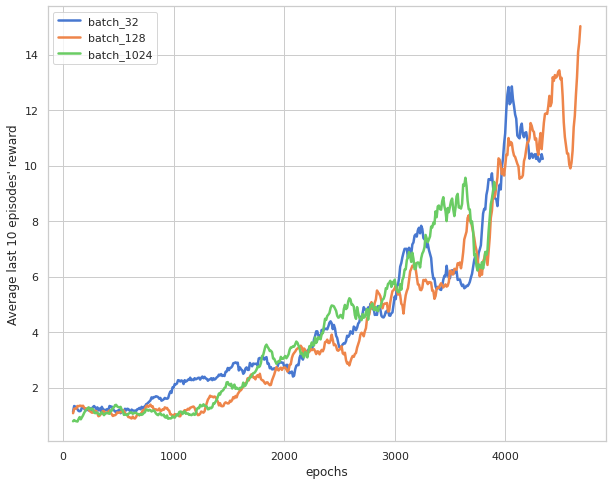

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

raw_data_paths = [
    '/content/drive/MyDrive/csci7000/2022-12-07-10-29-48/raw_data.txt',
    '/content/drive/MyDrive/csci7000/2022-12-08-05-22-46/raw_data.txt',
    '/content/drive/MyDrive/csci7000/2022-12-09-06-28-30/raw_data.txt'
    ]

colnames=['index', 'steps', 'reward'] 
df_32 = pd.read_csv(raw_data_paths[0], names=colnames, header=None)
df_128 = pd.read_csv(raw_data_paths[1], names=colnames, header=None)
df_1024 = pd.read_csv(raw_data_paths[2], names=colnames, header=None)


data = pd.DataFrame()

data['epochs'] = df_128['index'];
# data.set_index("ind", inplace = True)
data['batch_32'] = df_32['reward'];
data['batch_128'] = df_128['reward'];
data['batch_1024'] = df_1024['reward'];

labels = ['batch_32', 'batch_128', 'batch_1024']
fig = plt.figure(figsize=(10,8))
fig.set_facecolor('white')
sns.set(style="whitegrid", palette="muted", color_codes=False)
for _, label in enumerate(labels):
    x = data['epochs']
    y = data[label]
    plt.ylabel('Average last 10 episodes\' reward')
    sns.lineplot(x=x, y=y.rolling(10).mean(), label=label, linewidth=2.5)
    plt.legend()
plt.savefig('batch_coatnet.png')

In [2]:
%cd "/content/drive/MyDrive/csci7000"
!git clone https://github.com/nitinthedreamer/beat-dqn.git

/content/drive/MyDrive/csci7000
fatal: destination path 'beat-dqn' already exists and is not an empty directory.


In [3]:
!pip install -q gym[atari]
!pip install -q autorom[accept-rom-license]
!pip install -q celluloid
!pip install torch einops

     |████████████████████████████████| 1.6 MB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 254 kB/s 


In [ ]:
!python /content/drive/MyDrive/csci7000/beat-dqn/main.py --model coatdqn --goal episode --goalvalue 10000

/usr/local/lib/python3.8/dist-packages/jupyter_client/connect.py:28: DeprecationWarning: Jupyter is migrating its paths to use standard platformdirs
given by the platformdirs library.  To remove this warning and
see the appropriate new directories, set the environment variable
`JUPYTER_PLATFORM_DIRS=1` and then run `jupyter --paths`.
The use of platformdirs will be the default in `jupyter_core` v6
  from jupyter_core.paths import jupyter_data_dir, jupyter_runtime_dir, secure_write
model used : coatdqn
A.L.E: Arcade Learning Environment (version 0.7.5+db37282)
[Powered by Stella]
/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environm